In [1]:
import os
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import multiprocessing
print("num of cpus:", multiprocessing.cpu_count())

num of cpus: 8


In [2]:
#Load and preprocess the data
folder_path = '../data/TDS_15000/'
data = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None)
            df1.squeeze("columns")
            data[filename] = df1
            
# Combine all the data into a single dataframe
df1 = pd.concat(data.values())

display(df1)

,des_flux,detrap_en,def_conc
0,0.000000e+00,1.075086,0.012055
1,5.431556e+14,1.090598,0.012796
2,8.071071e+14,1.280902,0.002110
3,1.184429e+15,1.363821,0.024988
4,1.713761e+15,NaN,NaN
...,...,...,...
296,1.381320e+11,NaN,NaN
297,5.097957e+10,NaN,NaN
298,-1.185340e+11,NaN,NaN
299,-1.753088e+11,NaN,NaN


In [3]:
des_flux03=df1['des_flux']
des_flux03=des_flux03.tolist()
num_files=int(len(des_flux03)/301)
des_flux03=np.reshape(des_flux03, [num_files, 301])
des_flux03=pd.DataFrame(des_flux03)
display(des_flux03)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.000000e+00,5.431556e+14,8.071071e+14,1.184429e+15,1.713761e+15,2.445961e+15,3.429175e+15,4.721192e+15,6.375082e+15,8.442567e+15,...,5.140261e+08,9.834975e+09,6.844898e+09,-3.696907e+09,-1.254622e+10,-7.215040e+09,7.627497e+09,2.015646e+10,9.745521e+09,-8.880083e+09
1,0.000000e+00,2.596686e+12,4.076714e+12,6.351138e+12,9.803424e+12,1.500641e+13,2.279380e+13,3.434052e+13,5.130683e+13,7.590502e+13,...,1.002663e+10,-1.068198e+10,-6.840741e+09,-4.026817e+06,-8.034967e+08,-4.634127e+08,4.249926e+07,1.600916e+08,3.889720e+08,6.258744e+08
2,0.000000e+00,3.339683e+09,5.642021e+09,9.415832e+09,1.584884e+10,2.465948e+10,4.365091e+10,6.681661e+10,1.010321e+11,1.616761e+11,...,-1.188366e+12,-2.810876e+12,-2.920690e+12,-8.615067e+11,1.530847e+12,2.253783e+12,1.172452e+12,-1.771042e+11,-3.253680e+11,2.113905e+11
3,-5.954772e-11,4.283466e+14,6.382062e+14,9.398283e+14,1.366072e+15,1.960707e+15,2.768870e+15,3.843024e+15,5.236549e+15,7.001591e+15,...,-1.875557e+11,1.031065e+12,1.008990e+12,3.197083e+11,-1.727457e+11,-1.657147e+11,5.615346e+10,2.094252e+11,1.182019e+11,-3.624939e+10
4,0.000000e+00,5.503130e+09,9.322873e+09,1.560241e+10,2.633345e+10,4.105667e+10,7.291645e+10,1.117411e+11,1.673243e+11,2.699026e+11,...,4.325521e+11,1.969668e+12,1.547482e+12,3.087470e+11,-3.824844e+11,-2.502393e+11,1.849993e+11,3.979655e+11,2.018650e+11,-6.875192e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.000000e+00,3.716070e+08,6.477362e+08,1.116053e+09,1.937171e+09,2.998597e+09,5.132705e+09,8.034209e+09,1.292083e+10,2.935564e+10,...,1.115373e+12,-6.247980e+10,-1.570836e+11,-1.330799e+11,-1.303191e+11,-1.021088e+11,-7.449359e+10,-4.580231e+10,-6.773719e+09,-5.132272e+10
14996,0.000000e+00,1.648427e+11,2.678562e+11,4.291465e+11,6.896662e+11,1.096886e+12,1.640556e+12,2.468452e+12,3.832283e+12,6.040403e+12,...,6.053191e+12,1.156134e+12,-6.968984e+11,-1.321681e+12,-9.812151e+11,-7.408279e+11,-4.912488e+11,-3.512765e+11,-2.522848e+11,-5.532803e+10
14997,-4.351531e-10,3.258232e+15,4.518116e+15,6.134973e+15,8.158378e+15,1.063716e+16,1.362517e+16,1.717411e+16,2.135776e+16,2.624071e+16,...,6.938606e+12,3.134205e+12,3.128328e+11,-1.104769e+12,-1.689070e+12,-1.041729e+12,-7.312501e+11,-4.404335e+11,-2.053144e+11,-1.195245e+11
14998,0.000000e+00,1.587418e+14,2.393419e+14,3.573717e+14,5.281862e+14,7.721274e+14,1.115258e+15,1.589609e+15,2.232418e+15,3.084444e+15,...,-2.273954e+10,1.148413e+11,1.236938e+11,6.334739e+10,1.194185e+10,-3.746565e+09,-6.765696e+09,-1.137732e+10,-8.330577e+09,1.285371e+08


In [4]:
def_param = pd.read_csv("../data/def_param.csv", index_col=0)
def_param = def_param[0:15000]

In [13]:
#training data
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#Split into train and test sets
X_train , X_test = train_test_split(des_flux03, test_size = 0.2, random_state = 42)
y_train, y_test = train_test_split(def_param, test_size = 0.2, random_state = 42)

#Define the data preprocessing steps and the model
preprocessor = make_pipeline(StandardScaler())
model = LinearRegression()

# Fit the model using cross-validation
pipeline = make_pipeline(preprocessor, model)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation score: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Fit the model on the entire training set and evaluate on the test set
pipeline.fit(X_train, y_train)
test_score = pipeline.score(X_test, y_test)
print(f"Test set score : {test_score}")

Cross-validation score: [-0.00664053 -0.23898756 -0.0066803  -0.00691791 -0.00694035]
Mean cross-validation score: -0.05323332972519027
Test set score : 0.4651003652994553


In [14]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train.values)
X_test_norm = scaler.transform(X_test.values)

X_train_transform = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
X_test_transform = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

In [15]:
print(X_train_transform.shape, y_train.shape, X_test_transform.shape, y_test.shape)

(12000, 301) (12000, 8) (3000, 301) (3000, 8)


In [12]:
#Set up early stopping
#The val loss is regularly below the training loss
#This needs to be optimized

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
# Define the MLP model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)),
#    tf.keras.layers.Dropout(.2, input_shape=(64,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
#    tf.keras.layers.Dropout(.2, input_shape=(32,)),
    tf.keras.layers.Dense(units=32, activation='relu'),
#    tf.keras.layers.Dropout(.2, input_shape=(8,)),
    tf.keras.layers.Dense(units=8, activation='linear')
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train_transform, y_train, epochs=90, batch_size=32, validation_split=0.1, callbacks=[callback])

# Evaluate the model on the test set
test_loss = model.evaluate(X_test_transform, y_test)
print(f'Test loss: {test_loss:.4f}')

###Anze: Following loss function on both training and test set. 
###Dropout layers, learning rate decay, 

Epoch 1/90
380/380 [==============================] - 2s 3ms/step - loss: 0.0738 - val_loss: 0.0140
Epoch 2/90
380/380 [==============================] - 1s 2ms/step - loss: 0.0118 - val_loss: 0.0108
Epoch 3/90
380/380 [==============================] - 1s 2ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 4/90
380/380 [==============================] - 1s 2ms/step - loss: 0.0097 - val_loss: 0.0097
Epoch 5/90
380/380 [==============================] - 1s 2ms/step - loss: 0.0087 - val_loss: 0.0062
Epoch 6/90
380/380 [==============================] - 1s 2ms/step - loss: 0.0072 - val_loss: 0.0068
Epoch 7/90
380/380 [==============================] - 1s 2ms/step - loss: 0.0066 - val_loss: 0.0055
Epoch 8/90
380/380 [==============================] - 1s 2ms/step - loss: 0.0059 - val_loss: 0.0070
Epoch 9/90
380/380 [==============================] - 1s 2ms/step - loss: 0.0059 - val_loss: 0.0055
Epoch 10/90
380/380 [==============================] - 1s 3ms/step - loss: 0.0056 - val_loss: 0.0070

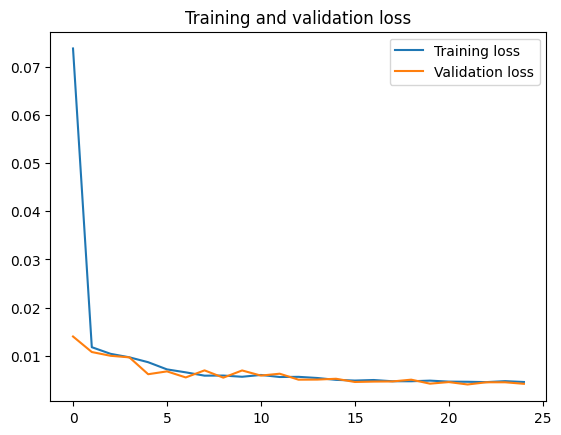

In [16]:
import keras

#Plotting the loss curve
loss = history.history["loss"]
val_loss = history.history["val_loss"]
n_epochs = len(loss)

import matplotlib.pyplot as plt

plt.plot(np.arange(n_epochs), loss, label='Training loss')
plt.plot(np.arange(n_epochs), val_loss, label='Validation loss')
plt.title('Training and validation loss')
#plt.xlim([0,50])
plt.legend()
plt.show()

In [17]:
ground_truth = pd.read_csv("../data/Ground Truth/TDS2.csv",\
                        header=None, names=['temperature', 'des_flux'], index_col=None)
ground_truth = ground_truth['des_flux'][0::3]
print(ground_truth)
ground_truth = np.reshape(ground_truth.values, [1, 301])
ground_truth.squeeze()
ground_truth=pd.DataFrame(ground_truth)
display(ground_truth)

0     -8.720280e+12
3     -8.720280e+12
6     -8.720280e+12
9     -8.720280e+12
12     2.720290e+13
           ...     
888    7.372650e+14
891    5.452170e+14
894    7.039320e+14
897    6.759680e+14
900    7.128530e+14
Name: des_flux, Length: 301, dtype: float64


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,-8.720280e+12,-8.720280e+12,-8.720280e+12,-8.720280e+12,2.720290e+13,-8.720280e+12,1.211500e+13,7.026510e+12,-8.720280e+12,-8.720280e+12,...,8.968340e+14,8.911630e+14,7.251540e+14,7.105960e+14,1.020000e+15,7.372650e+14,5.452170e+14,7.039320e+14,6.759680e+14,7.128530e+14


In [18]:
#These values look more like the model
#is predicting more TDS spectral data
#than defect parameters.
#This needs major work.
def_param_pred = model.predict(ground_truth)
print(def_param_pred)

[[ 1.02971741e+20  2.33602912e+20 -1.15079878e+20 -2.91995986e+19
  -2.83308517e+18  1.37262524e+18 -7.90644389e+18  9.38008854e+18]]
